In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
training_set = dataset.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## feature scaling standard normal distribution

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
x_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
regresor = Sequential()

In [14]:
regresor.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regresor.add(Dropout(0.2))

In [15]:
regresor.add(LSTM(units=50, return_sequences = True))
regresor.add(Dropout(0.2))

In [16]:
regresor.add(LSTM(units=50, return_sequences = True))
regresor.add(Dropout(0.2))

In [17]:
regresor.add(LSTM(units=50))
regresor.add(Dropout(0.2))

In [18]:
regresor.add(Dense(units=1))

In [19]:
regresor.compile(optimizer='adam', loss="mean_squared_error")

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [20]:
regresor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 7s 20ms/step - loss: 0.1036: 0s - loss:
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0070
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0055
Epoch 9/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0040
Epoch 10/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0041: 0s - loss: 0.00
Epoch 11/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0

In [217]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2017,778.81,789.63,775.80,786.14,"16,57,300"
1,01-04-2017,788.36,791.34,783.16,786.90,"10,73,000"
2,01-05-2017,786.08,794.48,785.02,794.02,"13,35,200"
3,01-06-2017,795.26,807.90,792.20,806.15,"16,40,200"
4,01-09-2017,806.40,809.97,802.83,806.65,"12,72,400"


In [218]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [219]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86],
       [   nan],
       [   nan]])

In [220]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis=0)

In [221]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [222]:
inputs = inputs.reshape(-1,1)

In [223]:
inputs = sc.transform(inputs)

In [231]:
x_test = []

In [232]:
for i in range(60, 83):
    #print(inputs[i-60:i, 0])
    x_test.append(inputs[i-60:i, 0])

In [233]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regresor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [234]:
predicted_stock_price

array([[789.92413],
       [786.98145],
       [787.37585],
       [788.9212 ],
       [792.2718 ],
       [797.9916 ],
       [802.86456],
       [804.2943 ],
       [804.0932 ],
       [803.7974 ],
       [803.9245 ],
       [804.21857],
       [804.5512 ],
       [805.4532 ],
       [806.55927],
       [811.2905 ],
       [818.06903],
       [824.9381 ],
       [828.01447],
       [822.83417],
       [811.82227],
       [      nan],
       [      nan]], dtype=float32)

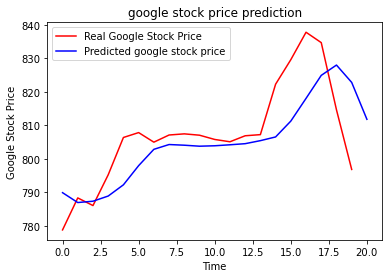

In [235]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label= "Predicted google stock price")
plt.title('google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

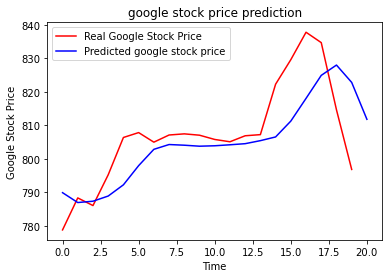

In [236]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label= "Predicted google stock price")
plt.title('google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [237]:
predicted_stock_price

array([[789.92413],
       [786.98145],
       [787.37585],
       [788.9212 ],
       [792.2718 ],
       [797.9916 ],
       [802.86456],
       [804.2943 ],
       [804.0932 ],
       [803.7974 ],
       [803.9245 ],
       [804.21857],
       [804.5512 ],
       [805.4532 ],
       [806.55927],
       [811.2905 ],
       [818.06903],
       [824.9381 ],
       [828.01447],
       [822.83417],
       [811.82227],
       [      nan],
       [      nan]], dtype=float32)